# MACHINE LEARNING-BASED PREDICTION OF COVID-19 DIAGNOSIS BASED ON SYMPTOMS


---



---



# IMPORTANCE OF THE PROPOSAL


---



*   The COVID_19 Pandemic challenged the medical systems worldwide in many aspects including

1.   Sharp increase in demand for hospital beds
2.   Critical shortages in medical equipments
3.   Shortage of healthcare professionals, many being affected themselves.


*  Thus, the capacity for immediate clinical decisions and effective usage of healthcare resources is crucial, not just in this Pandemic but also for any other future diseases which might evolve into a pandemic.

* This prediction model, that combines several features to estimate the risk of infection would be of great help in assisting the medical staff worldwide in triaging patients,especially in the context of limited healthcare resources.





**GAP IN THE KNOWLEDGE**


---



*   This model predicted COVID-19 test results with high accuracy using only eight binary features: sex, age ≥60 years, known contact with an infected individual, and the appearance of five initial clinical symptoms.
*   However,this research is not without shortcomings as it relied on the data that had few limitations such as

1.   Missing information of some of the important features like 'Age above 60'
2.   Some symptoms like 'Lack of smell and Taste' which was identified as being very predictive of COVID-19 infection was not recorded in the data.
3.   'Comorbidities' if any, were not recorded in the data, which would have added more depth to the analysis.






# DATA EXPLORATION


---



In [ ]:
# Importing the necessary libraries

import pandas as pd # for data analysis
import numpy as np # for numerical calculations and dealing with vectors and matrices
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset

df=pd.read_csv("/content/drive/MyDrive/corona_tested_006.csv",dtype="object")

In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
# checking the shape of the dataframe- number of rows and columns
# The dataset has a total of 278848 rows and 11 columns

df.shape

(278848, 11)

In [ ]:
# Checking the datatype of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  object
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: object(11)
memory usage: 23.4+ MB


In [ ]:
# checking for null values

df.isnull().sum()



Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

***isnull().sum() doesnt show any null values in columns because the null values are not entered in the format np.nan but rather as 'None'***

In [ ]:
# checking for duplicated rows
df[df.duplicated()]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


# DATA PRE-PROCESSING


---



In [ ]:
# changing the datatype of the 'Test_date' column to datetime

df['Test_date']=pd.to_datetime(df['Test_date'],dayfirst=True)

In [ ]:
# The columns "Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache" have entries for true false values in two different formats.
# Since python is case sensitive they are considered two different values.
# So, converting them to lowercase to be considered as same

# tf_list has the column names which have repeated values in upper and lower case
tf_list=["Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache",]

for i in tf_list:
  df[i]=df[i].apply(lambda x: x.lower() if isinstance(x,str) else x)

for i in tf_list:
  df[i]=df[i].astype("object")

In [ ]:
# Checking the distinct values in columns

tf_list=["Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache"]
for i in tf_list:
  print(i)
  print(df[i].value_counts())
  print("------------------------------")

Cough_symptoms
false    236368
true      42228
none        252
Name: Cough_symptoms, dtype: int64
------------------------------
Fever
false    256844
true      21752
none        252
Name: Fever, dtype: int64
------------------------------
Sore_throat
false    276921
true       1926
none          1
Name: Sore_throat, dtype: int64
------------------------------
Shortness_of_breath
false    277270
true       1577
none          1
Name: Shortness_of_breath, dtype: int64
------------------------------
Headache
false    276433
true       2414
none          1
Name: Headache, dtype: int64
------------------------------


In [ ]:
# The column Corona- The target variable holds a value other, which we would change it to the mode value of the column to enable Binary Classification

df['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [ ]:
# missing values are less than 10% so impute them with the mode value

df['Sex'].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

In [ ]:
 # This column holds nominal data so, get_dummies function would be used to encode the values

df['Known_contact'].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

***Here , in these columns the value 'none','other' represents Null values, which have to be imputed.***

**HANDLING MISSING VALUES**


---



In [ ]:
# Handling missing values in 'Corona' column
# filling the values 'other' with the mode of the column
r=df['Corona'].mode()[0]
df['Corona']=df['Corona'].apply(lambda x:r if x=="other" else x)
df['Corona'].unique()

array(['negative', 'positive'], dtype=object)

In [ ]:
# Replacing none values in the column sex with the mode of the column

rep=df['Sex'].mode()[0]
df['Sex']=df['Sex'].apply(lambda x:rep if x=="None" else x)
df['Sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
# replacing none values in columns
tf_list=["Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache"]

for i in tf_list:
  df[i]=df[i].apply(lambda x:df[i].mode()[0] if x=="none" else x)

for i in tf_list:
  df[i]=df[i].astype("object")


In [ ]:
 # nearly 50% of data in the column "Age_60_above" is "None".
 # Mode imputation could be biased, since the data is imbalanced

df['Age_60_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

Text(0.5, 1.0, 'visualization of Age column')

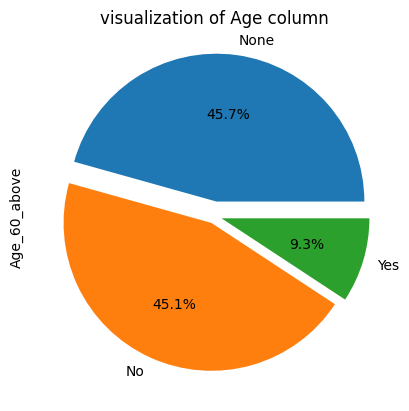

In [ ]:
# Nearly 50% of the data in the column is missing
# Imputation based on mode value would not do justice to the column

df['Age_60_above'].value_counts().plot(kind="pie",autopct="%1.1f%%",explode=(0.1,0.05,0.05))
plt.title("visualization of Age column")

# DATA VISUALIZATION


---



---



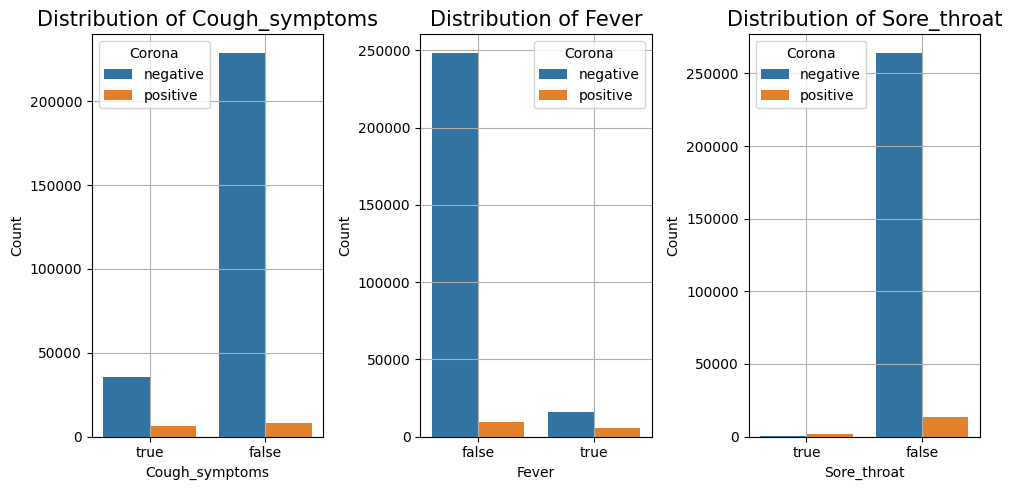

In [ ]:
# univariate analysis

cols = ['Cough_symptoms', 'Fever', 'Sore_throat']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

# Plot univariate distributions for each column

for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, hue='Corona',ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=15 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


***From the graphs it is clear that Most of the patients who did not have symptoms like cough, fever, sore_throat tested Negative for Corona***

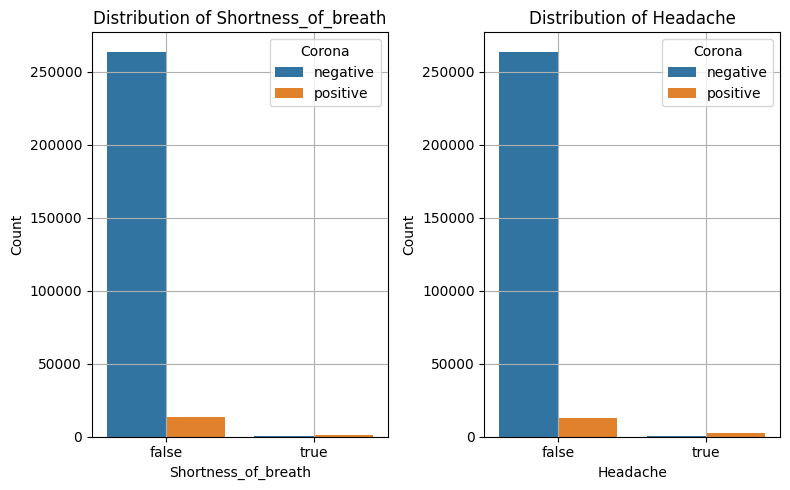

In [ ]:
# univariate analysis

cols2 = ['Shortness_of_breath', 'Headache']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,5))

# Plot univariate distributions for each column

for i, col in enumerate(cols2):
    sns.countplot(data=df , x=col, hue='Corona',ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=12)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

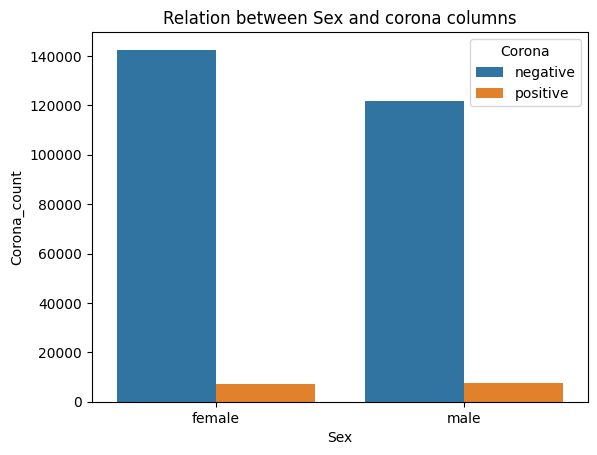

In [ ]:
# Visualization of relation between sex column and Corona column

sns.countplot(x=df['Sex'],hue=df['Corona'])
plt.title("Relation between Sex and corona columns")
plt.ylabel("Corona_count")
plt.show()

***It is evident from the graph that number of female and male patients who tested positive for Corona were almost same.***

Text(0.5, 1.0, 'Visualization of the Known contact column')

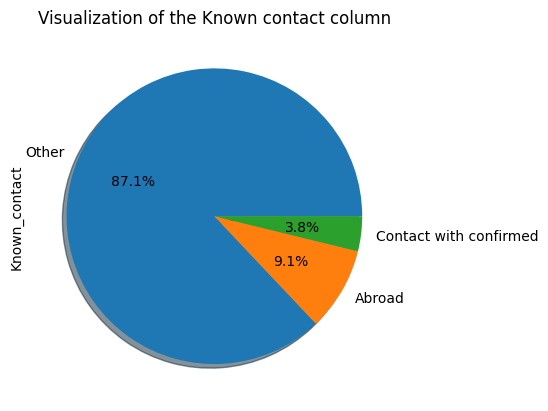

In [ ]:
# Visualization of known contact column

df['Known_contact'].value_counts().plot(kind='pie',autopct="%1.1f%%",shadow=True)
plt.title("Visualization of the Known contact column")

In [ ]:
 # Data without any null values
 # taking a  copy for  SQL analysis

cdf=df.copy()

**FEATURE ENCODING**


---



In [ ]:
# Using get_dummies function to encode columns which hold Nominal data.

df=pd.get_dummies(df,columns=["Known_contact","Sex"],drop_first=True)

In [ ]:
# encoding values

mappings={"Corona":{"negative":0,"positive":1},
          "Cough_symptoms":{"true":1,"false":0},
          "Fever":{"true":1,"false":0},
          "Sore_throat":{"true":1,"false":0},
          "Shortness_of_breath":{"true":1,"false":0},
          "Headache":{"true":1,"false":0},
          "Age_60_above":{"None":np.nan,"Yes":1,"No":0}}


for col in df:
  if col in mappings:
    df[col]=df[col].map(mappings[col])

In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Known_contact_Contact with confirmed,Known_contact_Other,Sex_male
0,1,2020-03-11,1,0,1,0,0,0,NaN,0,0,0
1,2,2020-03-11,0,1,0,0,0,1,NaN,0,0,0
2,3,2020-03-11,0,1,0,0,0,1,NaN,0,0,0
3,4,2020-03-11,1,0,0,0,0,0,NaN,0,0,0
4,5,2020-03-11,1,0,0,0,0,0,NaN,1,0,0


In [ ]:
# Taking a copy of the encoded data

cdf1=df.copy()

In [ ]:
# Dropping the column "Ind_ID" and "Test_date"

df.drop(columns=["Test_date","Ind_ID"],axis=1,inplace=True)

**IMPUTATION OF MISSING VALUES IN AGE COLUMN USING MICE**


---



In [ ]:
#impdf is used to impute missing values in the age column using MICE technique.

impdf=df.copy()


In [ ]:
# importing libraries for MICE imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer=IterativeImputer(random_state=0)
imputer.fit(impdf)

IterativeImputer(random_state=0)

In [ ]:
df_imputed=imputer.transform(impdf)

In [ ]:
# replacing the values in the age column
impdf.loc[:,["Age_60_above"]]=df_imputed[:,6].round()

In [ ]:
impdf["Age_60_above"].value_counts()

0.0    253023
1.0     25825
Name: Age_60_above, dtype: int64

In [ ]:
impdf["Age_60_above"]=impdf["Age_60_above"].astype("int")

In [ ]:
# Data is cleaned and encoded without any null values.

impdf.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Known_contact_Contact with confirmed,Known_contact_Other,Sex_male
0,1,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0


# INITIAL HYPOTHESIS


---



**NULL HYPOTHESIS 1:**
**The target variabe 'Corona' would have the highest correlation with any one of the symptoms which are taken as features.**






**NULL HYPOTHESIS 2: The Xgboost Classifier would perform better for this classification problem compared to Logistic Regression.**

# MACHINE LEARNING APPROACH


---



---

**TRAINING THE MODELS**

In [ ]:
# split the data into Target variable and Independent columns
# y holds the Target Variable

y=impdf['Corona']


In [ ]:
# x holds all the independent variables.

x=impdf.drop(columns=['Corona'],axis=1)


In [ ]:
# cross validation
# Splitting the data into Train and Test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**MODEL 1: LOGISTIC REGRESSION**


---



In [ ]:
# Training the model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Evaluating model 1
y_pred1=lr.predict(x_test)

In [ ]:
# Since the data in target column is imbalanced , we check precision,recall,f1_score

from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

lr1=round(accuracy_score(y_test,y_pred1),4)
lr2=round(precision_score(y_test,y_pred1),4)
lr3=round(recall_score(y_test,y_pred1),4)
lr4=round(f1_score(y_test,y_pred1),4)

print("Accuracy score of logistic regression",lr1)
print("Precision score of logistic regression",lr2)
print("Recall score of logistic regression",lr3)
print("f1 score of logistic regression",lr4)



Accuracy score of logistic regression 0.9629
Precision score of logistic regression 0.7394
Recall score of logistic regression 0.4686
f1 score of logistic regression 0.5736


**MODEL 2:DECISION TREE**


---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Evaluating model2
y_pred2=dt.predict(x_test)

In [ ]:
dt1=round(accuracy_score(y_test,y_pred2),4)
dt2=round(precision_score(y_test,y_pred2),4)
dt3=round(recall_score(y_test,y_pred2),4)
dt4=round(f1_score(y_test,y_pred2),4)
print("Accuracy score of Decision Tree",dt1)
print("Precision score of Decision Tree",dt2)
print("Recall score of Decision Tree",dt3)
print("f1 score of Decision Tree",dt4)

Accuracy score of Decision Tree 0.9666
Precision score of Decision Tree 0.7669
Recall score of Decision Tree 0.5355
f1 score of Decision Tree 0.6306


**MODEL 3: RANDOM FOREST**


---



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
# Evaluating model3
y_pred3=rf.predict(x_test)

In [ ]:
rf1=round(accuracy_score(y_test,y_pred3),4)
rf2=round(precision_score(y_test,y_pred3),4)
rf3=round(recall_score(y_test,y_pred3),4)
rf4=round(f1_score(y_test,y_pred3),4)

print("Accuracy score of Random Forest",rf1)
print("Precision score of Random Forest",rf2)
print("Recall score of Random Forest",rf3)
print("f1 score of Random Forest",rf4)

Accuracy score of Random Forest 0.9666
Precision score of Random Forest 0.767
Recall score of Random Forest 0.5358
f1 score of Random Forest 0.6309


**CROSS-VALIDATION**

In [ ]:
# k fold cross validation for RandomForest model
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rf,x,y,scoring="f1",cv=5)
print(cv_score)

[0.62349103 0.69373942 0.61631016 0.61974929 0.59311927]


***With cross_validation technique the RandomForest model was able to achieve a f1_score as high as 0.693***

**MODEL 4:XGBOOST**


---



In [ ]:
# model training

from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Evaluating model4
y_pred4=xg.predict(x_test)

In [ ]:
xg1=round(accuracy_score(y_test,y_pred4),4)
xg2=round(precision_score(y_test,y_pred4),4)
xg3=round(recall_score(y_test,y_pred4),4)
xg4=round(f1_score(y_test,y_pred4),4)

print("Accuracy score of XgBoost",xg1)
print("Precision score of XgBoost",xg2)
print("Recall score of XgBoost",xg3)
print("f1 score of XgBoost",xg4)

Accuracy score of XgBoost 0.9666
Precision score of XgBoost 0.767
Recall score of XgBoost 0.5358
f1 score of XgBoost 0.6309


**CROSS-VALIDATION**

In [ ]:
# k fold cross validation for improving the score
from sklearn.model_selection import cross_val_score
cv_score2=cross_val_score(xg,x,y,scoring="f1",cv=5)
print(cv_score2)

[0.62132112 0.6943609  0.61700351 0.62112893 0.59311927]


***With cross_validation technique the XGBoost model was able to achieve a f1_score as high as 0.694***

**COMPARISON OF THE PERFORMANCE OF THE MODELS**


---



***Since the 'Corona' column data is imbalanced, checking precision,recall and f1-scores would be more appropriate to evaluate the performance of the ML models.***



1.   ***The precision score of all the four models look almost the same which is around 0.7***
2.   ***But there is significant difference in the f1_scores of the models.Logistic Regression has less f1-score compared to the other three models.***



In [ ]:
d={'ML ModelName':['Logistic Regression','DecisionTree','RandomForest','XGBoost'],
   'PrecisionScores':[lr2,dt2,rf2,xg2],
   'f1_scores':[lr4,dt4,rf4,xg4]}
ml_score=pd.DataFrame(d)
ml_score

,ML ModelName,PrecisionScores,f1_scores
0,Logistic Regression,0.7394,0.5736
1,DecisionTree,0.7669,0.6306
2,RandomForest,0.7670,0.6309
3,XGBoost,0.7670,0.6309


Text(0.5, 1.0, 'Comparison of ML model Performance Metrics')

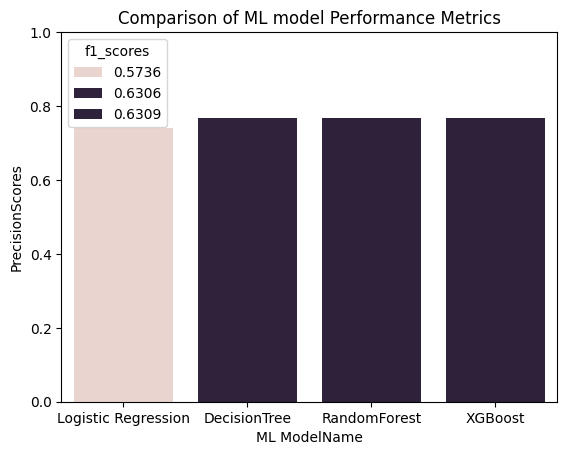

In [ ]:
fig=sns.barplot(x=ml_score['ML ModelName'],y=ml_score['PrecisionScores'],hue=ml_score['f1_scores'])
fig.set_ylim(0,1)
plt.title("Comparison of ML model Performance Metrics")

***From the analysis it is clear that the XGBoostClassifer performs better than the logisticRegression model.So,we fail to reject the null hypothesis-2.***

**CORRELATION ANALYSIS**


---



In [ ]:
# checking the correlation of the target column with other independent columns

impdf.corr()['Corona']

Cough_symptoms                          0.194711
Fever                                   0.263649
Sore_throat                             0.275718
Shortness_of_breath                     0.231057
Headache                                0.364739
Corona                                  1.000000
Age_60_above                            0.046452
Known_contact_Contact with confirmed    0.565439
Known_contact_Other                    -0.347643
Sex_male                                0.022456
Name: Corona, dtype: float64

Text(0.5, 1.0, 'Correlation Analysis')

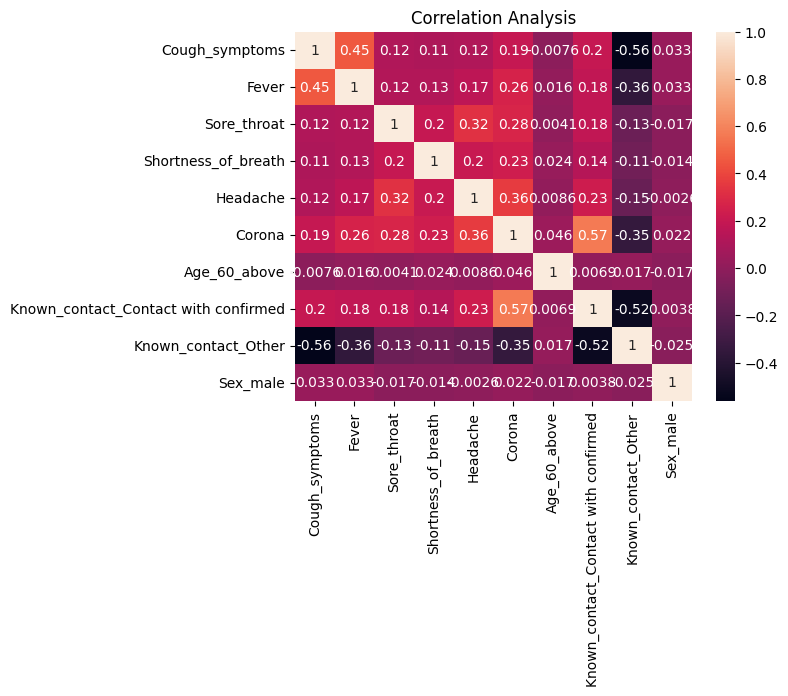

In [ ]:
sns.heatmap(impdf.corr(),annot=True)
plt.title("Correlation Analysis")

***Highest found correlation was between Corona and contact with confirmed column,0.57***

**FEATURE IMPORTANCE**


---



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
def select_features(x_train, y_train, x_test):
 fs = SelectKBest(score_func=chi2, k='all')
 fs.fit(x_train, y_train)
 x_train_fs = fs.transform(x_train)
 x_test_fs = fs.transform(x_test)
 return x_train_fs, x_test_fs, fs

Feature 0: 7102.089231
Feature 1: 14105.322123
Feature 2: 17115.582621
Feature 3: 12139.218963
Feature 4: 29527.646262
Feature 5: 463.511997
Feature 6: 68800.886958
Feature 7: 3504.047492
Feature 8: 56.473363


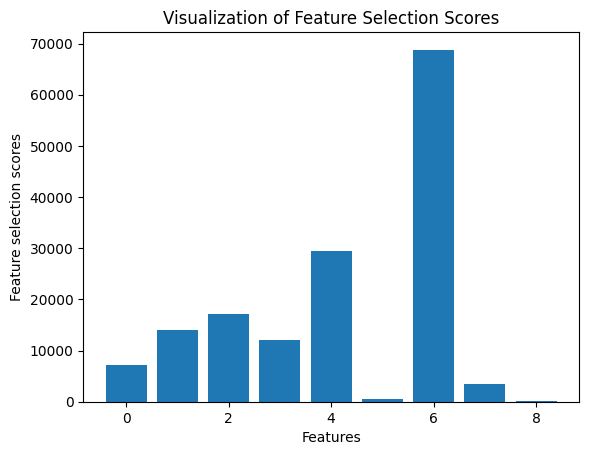

In [ ]:
x_train_fs, x_test_fs, fs = select_features(x_train,y_train,x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel("Features")
plt.ylabel("Feature selection scores")
plt.title("Visualization of Feature Selection Scores")
plt.show()

***From the feature scores it is clear that the 'contact with the confirmed' column is the most important of all.***

# CONCLUSION


---



---



**NULL HYPOTHESIS 1:**
**The target variabe 'Corona' would have the highest correlation with any one of the symptoms which are taken as features.**



---



***From the correlation analysis and feature scores, we have enough evidence to reject the Null Hypothesis- 1 which states that the target variable has highest correlation with one of the symptoms columns.***

**NULL HYPOTHESIS 2: The Xgboost Classifier would perform better for this classification problem compared to Logistic Regression.**


---



***From the analysis it is clear that the XGBoostClassifer performs better than the logisticRegression model.So,we fail to reject the null hypothesis-2.***

# SQL QUERIES


---



---



In [ ]:
# Using copy of the cleaned dataset
cdf=pd.read_csv("/content/drive/MyDrive/cordata1.csv")

In [ ]:
cdf.head()

,Unnamed: 0,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,0,1,2020-03-11,1,0,1,0,0,0,None,female,Abroad
1,1,2,2020-03-11,0,1,0,0,0,1,None,female,Abroad
2,2,3,2020-03-11,0,1,0,0,0,1,None,female,Abroad
3,3,4,2020-03-11,1,0,0,0,0,0,None,female,Abroad
4,4,5,2020-03-11,1,0,0,0,0,0,None,female,Contact with confirmed


In [ ]:
import duckdb
conn=duckdb.connect()
conn.register('cdf',df)

In [ ]:
# 1.Find the number of corona patients who faced shortness of breath.

conn.execute("select count(*) as No_of_patients from cdf where Shortness_of_breath==1 and Corona==1").fetchdf()

,No_of_patients
0,1164


In [ ]:
#2.Find the number of negative corona patients who have fever and sore_throat.

conn.execute("select count(*) as Patient_count from cdf where Corona==0 and Fever==1 and Sore_throat==1 ").fetchdf()

,Patient_count
0,142


In [ ]:
#3.Group the data by month and rank the number of positive cases

conn.execute("select temp.*,rank()over(order by temp.No_of_Positive_cases DESC) as cases_rank from(select month(CAST(Test_date as DATE)) as Month,count(*) as No_of_Positive_cases from cdf where corona==1 group by month(CAST(Test_date as DATE)))temp").fetchdf()


,Month,No_of_Positive_cases,cases_rank
0,4,8881,1
1,3,5848,2


In [ ]:
#4.Find the female negative corona patients who faced cough and headache.

conn.execute("select Ind_ID from cdf where Sex=='female' and Corona==0 and Cough_symptoms==1 and Headache==1 ").fetchdf()

,Ind_ID
0,340
1,493
2,511
3,936
4,1113
...,...
64,149178
65,163207
66,168703
67,229307


In [ ]:
#5.How many elderly corona patients have faced breathing problems?

conn.execute("select count(*) as No_of_elderly from cdf where Age_60_above=='Yes' and Shortness_of_breath==1 and Corona==1").fetchdf()

,No_of_elderly
0,263


In [ ]:
# 6.Which three symptoms were more common among COVID positive patients?

conn.execute("select sum(Cough_symptoms) as cough_count,sum(Fever) as Fever_count,sum(Headache) as Headache_count,sum(Sore_throat) as Sore_throat_count,sum(Shortness_of_breath) as breathing_trouble from cdf group by corona having corona==1").fetchdf()



,cough_count,Fever_count,Headache_count,Sore_throat_count,breathing_trouble
0,6584.0,5559.0,2235.0,1526.0,1164.0


*The three more common symptoms were Cough,Fever and Headache*

In [ ]:
#7.Which symptom was less common among COVID negative people?


conn.execute("select sum(Headache) as Headache_count,sum(Sore_throat) as Sorethroat_count,sum(Shortness_of_breath) as breathing_trouble,sum(Fever) as ferver_count,sum(Cough_symptoms) as cough_count from cdf where corona==0").fetchdf()

,Headache_count,Sorethroat_count,breathing_trouble,ferver_count,cough_count
0,179.0,400.0,413.0,16193.0,35644.0


*The symptom which was less common among covid negative people was Headache.*

In [ ]:
#8.What are the most common symptoms among COVID positive males whose known contact was abroad?

conn.execute("select sum(Cough_symptoms) as cough_count,sum(Fever) as Fever_count,sum(Headache) as Headache_count,sum(Sore_throat) as Sore_throat_count,sum(Shortness_of_breath) as breathing_trouble from cdf where sex=='male' and Known_contact=='Abroad' group by corona having corona==1").fetchdf()

,cough_count,Fever_count,Headache_count,Sore_throat_count,breathing_trouble
0,532.0,407.0,129.0,87.0,84.0


*The most common symptoms among covid positive males whose known contact was Abroad were Cough and Fever*



---



---



#              -----------------------------------------------------END------------------------------------------------------